In [ ]:
import pandas as pd      

df = pd.read_csv("./P00000001-ALL.csv")
print(df.columns)

In [ ]:
df_new = df[(df["cand_nm"] == "Obama, Barack" & df["cand_nm"] == "McCain, John S")]
df_group = df_new.groupby("cand_nm")["contb_receipt_amt"].mean()
print(df_group)

In [ ]:
import pandas as pd

df = pd.read_csv("./P00000001-ALL.csv")

obama_contributions = df[df["cand_nm"] == "Obama, Barack"]["contb_receipt_amt"]
mccain_contributions = df[df["cand_nm"] == "McCain, John S"]["contb_receipt_amt"]

avg_obama_contribution = obama_contributions.mean()
avg_mccain_contribution = mccain_contributions.mean()

print("Average contribution for Obama campaign: ${:.2f}".format(avg_obama_contribution))
print(
    "Average contribution for McCain campaign: ${:.2f}".format(avg_mccain_contribution)
)

effect_size = avg_mccain_contribution - avg_obama_contribution
print("Effect size: ${:.2f}".format(effect_size))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

obama_contributions = df[df["cand_nm"] == "Obama, Barack"]["contb_receipt_amt"]
mccain_contributions = df[df["cand_nm"] == "McCain, John S"]["contb_receipt_amt"]

increment = 100
plt.figure(figsize=(10, 6))

plt.hist(obama_contributions,bins=range(
        int(min(obama_contributions)),
        int(max(obama_contributions)) + increment,
        increment,
    ),
    color="blue",
    alpha=0.5,
    label="Obama",
)
plt.hist(
    mccain_contributions,
    bins=range(
        int(min(mccain_contributions)),
        int(max(mccain_contributions)) + increment,
        increment,
    ),
    color="red",
    alpha=0.5,
    label="McCain",
)

plt.legend()
plt.show()

In [ ]:
from scipy import stats
import pandas as pd
# import welchttest

df = pd.read_csv("./P00000001-ALL.csv")

# Filter data for Obama and McCain campaigns
obama_contributions = df[df["cand_nm"] == "Obama, Barack"]["contb_receipt_amt"]
mccain_contributions = df[df["cand_nm"] == "McCain, John S"]["contb_receipt_amt"]

# Perform Welch's t-test
t_statistic, p_value = stats.ttest_ind(obama_contributions, mccain_contributions, equal_var=False)

print("Welch's t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Check if p-value is significant
if p_value < 0.05:
    print("The effect size between McCain and Obama is significant.")
else:
    print("The effect size between McCain and Obama is not significant.")

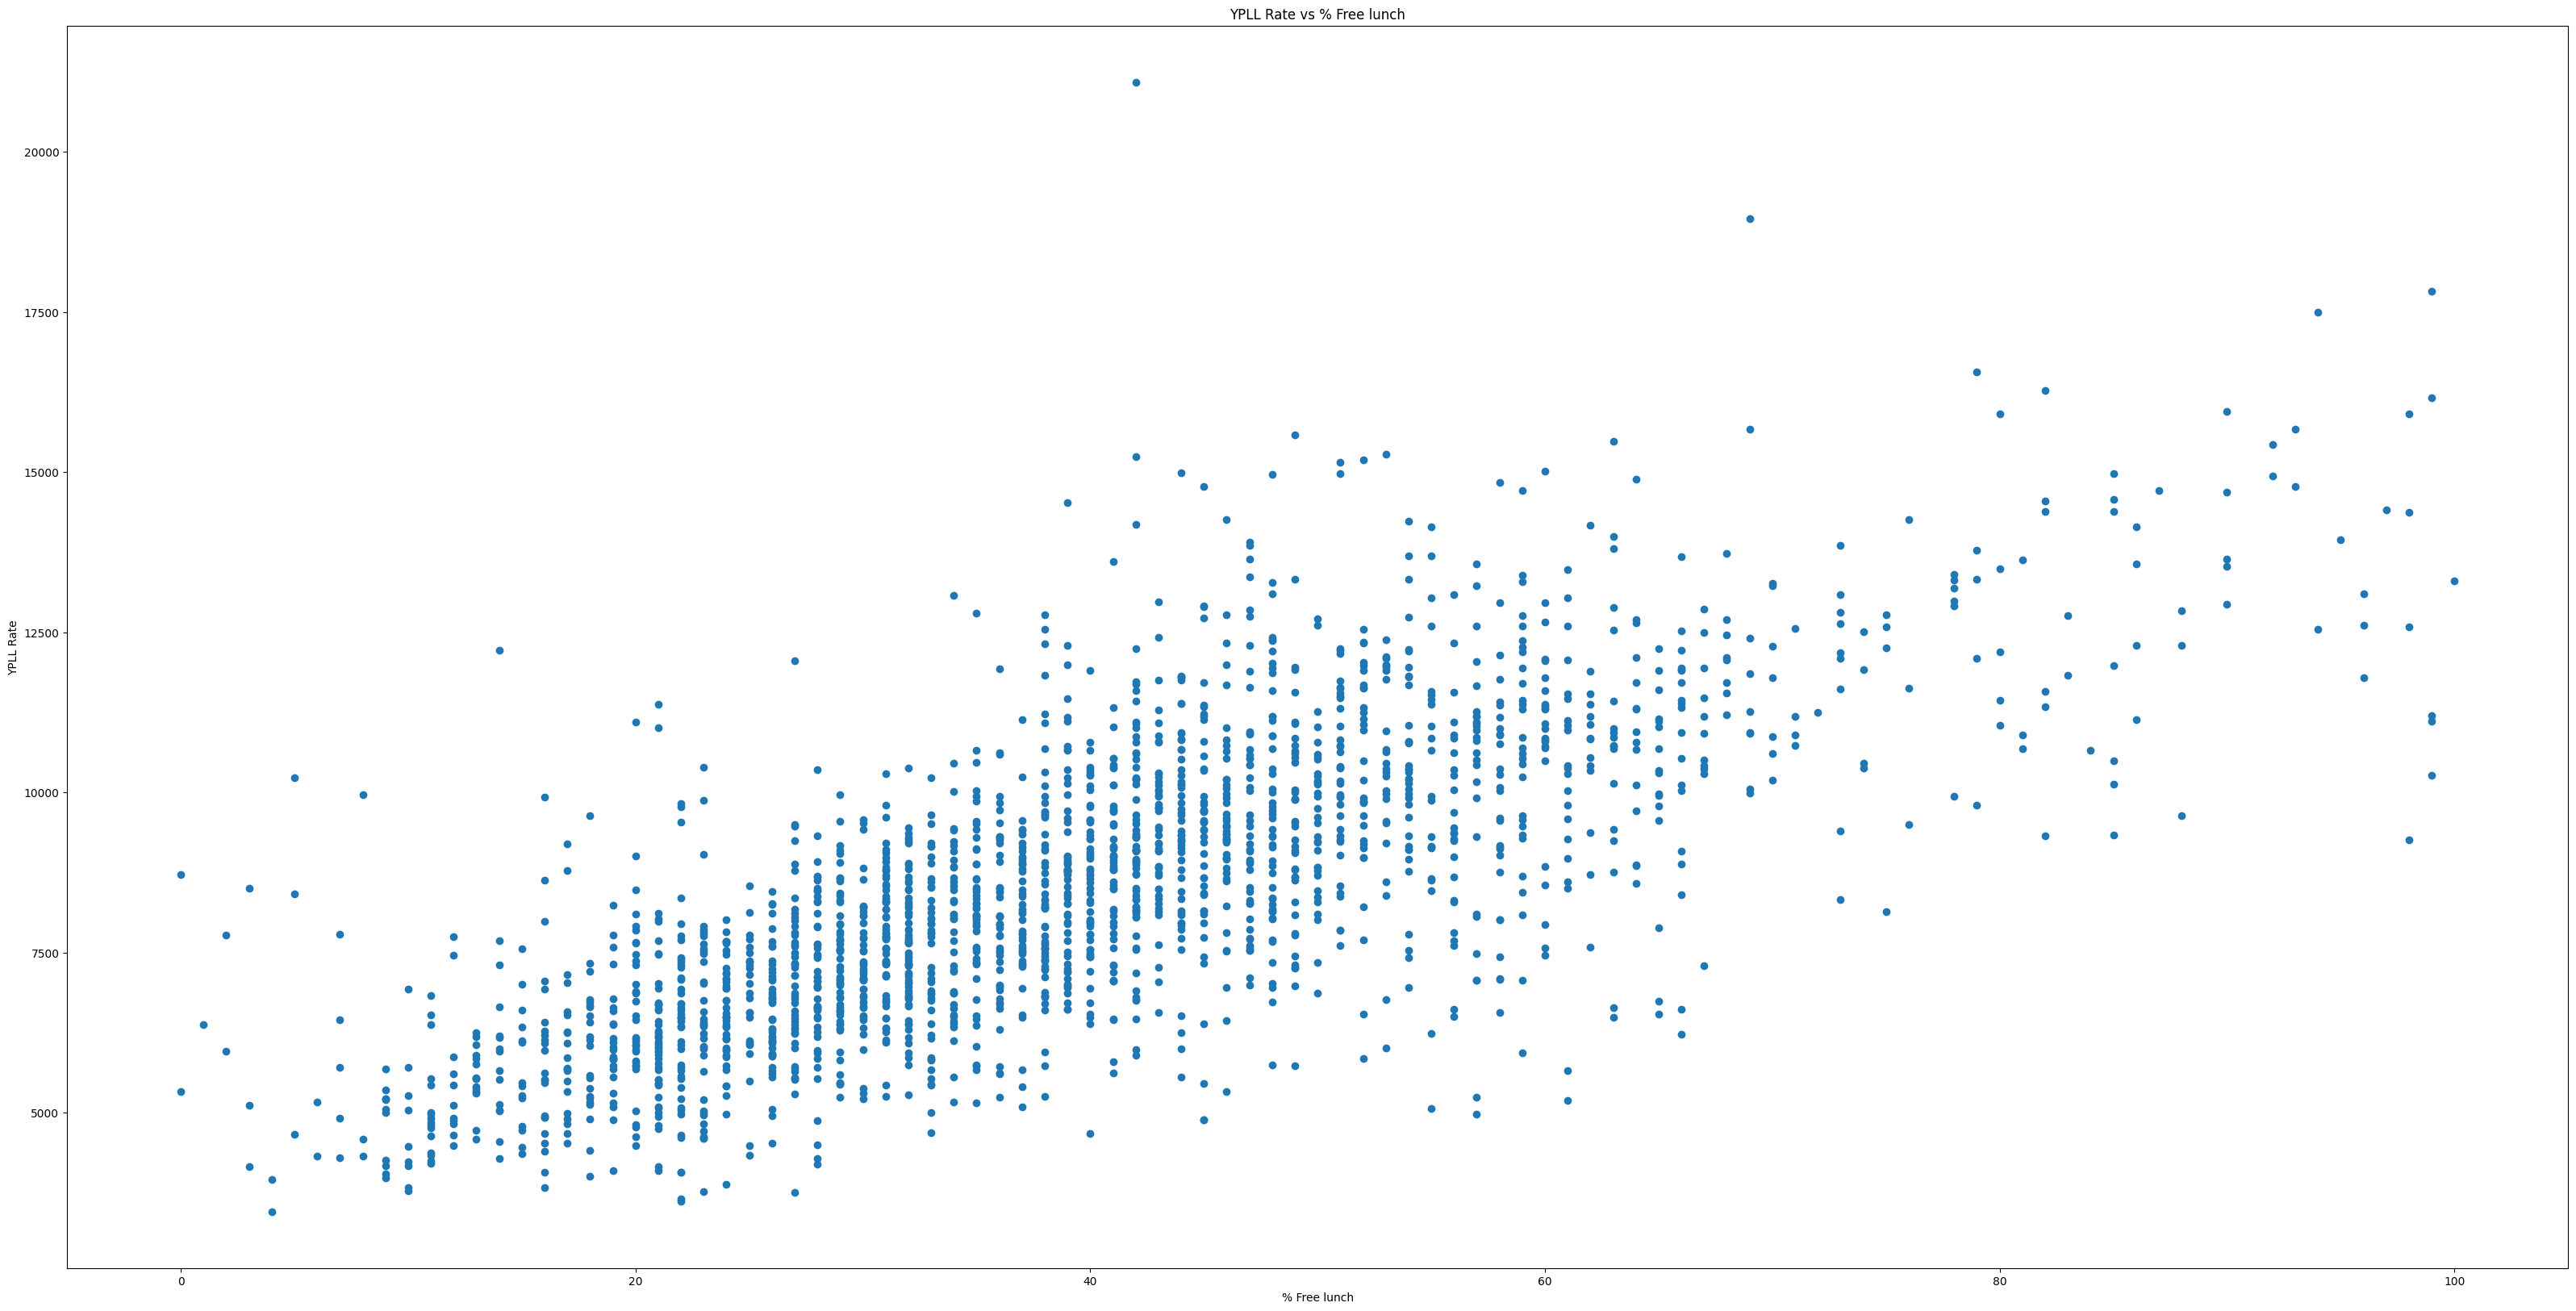

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ypll_df = pd.read_csv("../county_health_rankings/ypll.csv")
additional_measures_clean = pd.read_csv(
    "../county_health_rankings/additional_measures_cleaned.csv")

wanted_data = pd.merge(ypll_df, additional_measures_clean , on="FIPS")

plt.figure(figsize=(40,20))
plt.scatter(x = wanted_data["% Free lunch"] , y = wanted_data["YPLL Rate"])
plt.xlabel("% Free lunch")
plt.ylabel("YPLL Rate")
plt.title("YPLL Rate vs % Free lunch")
plt.show()

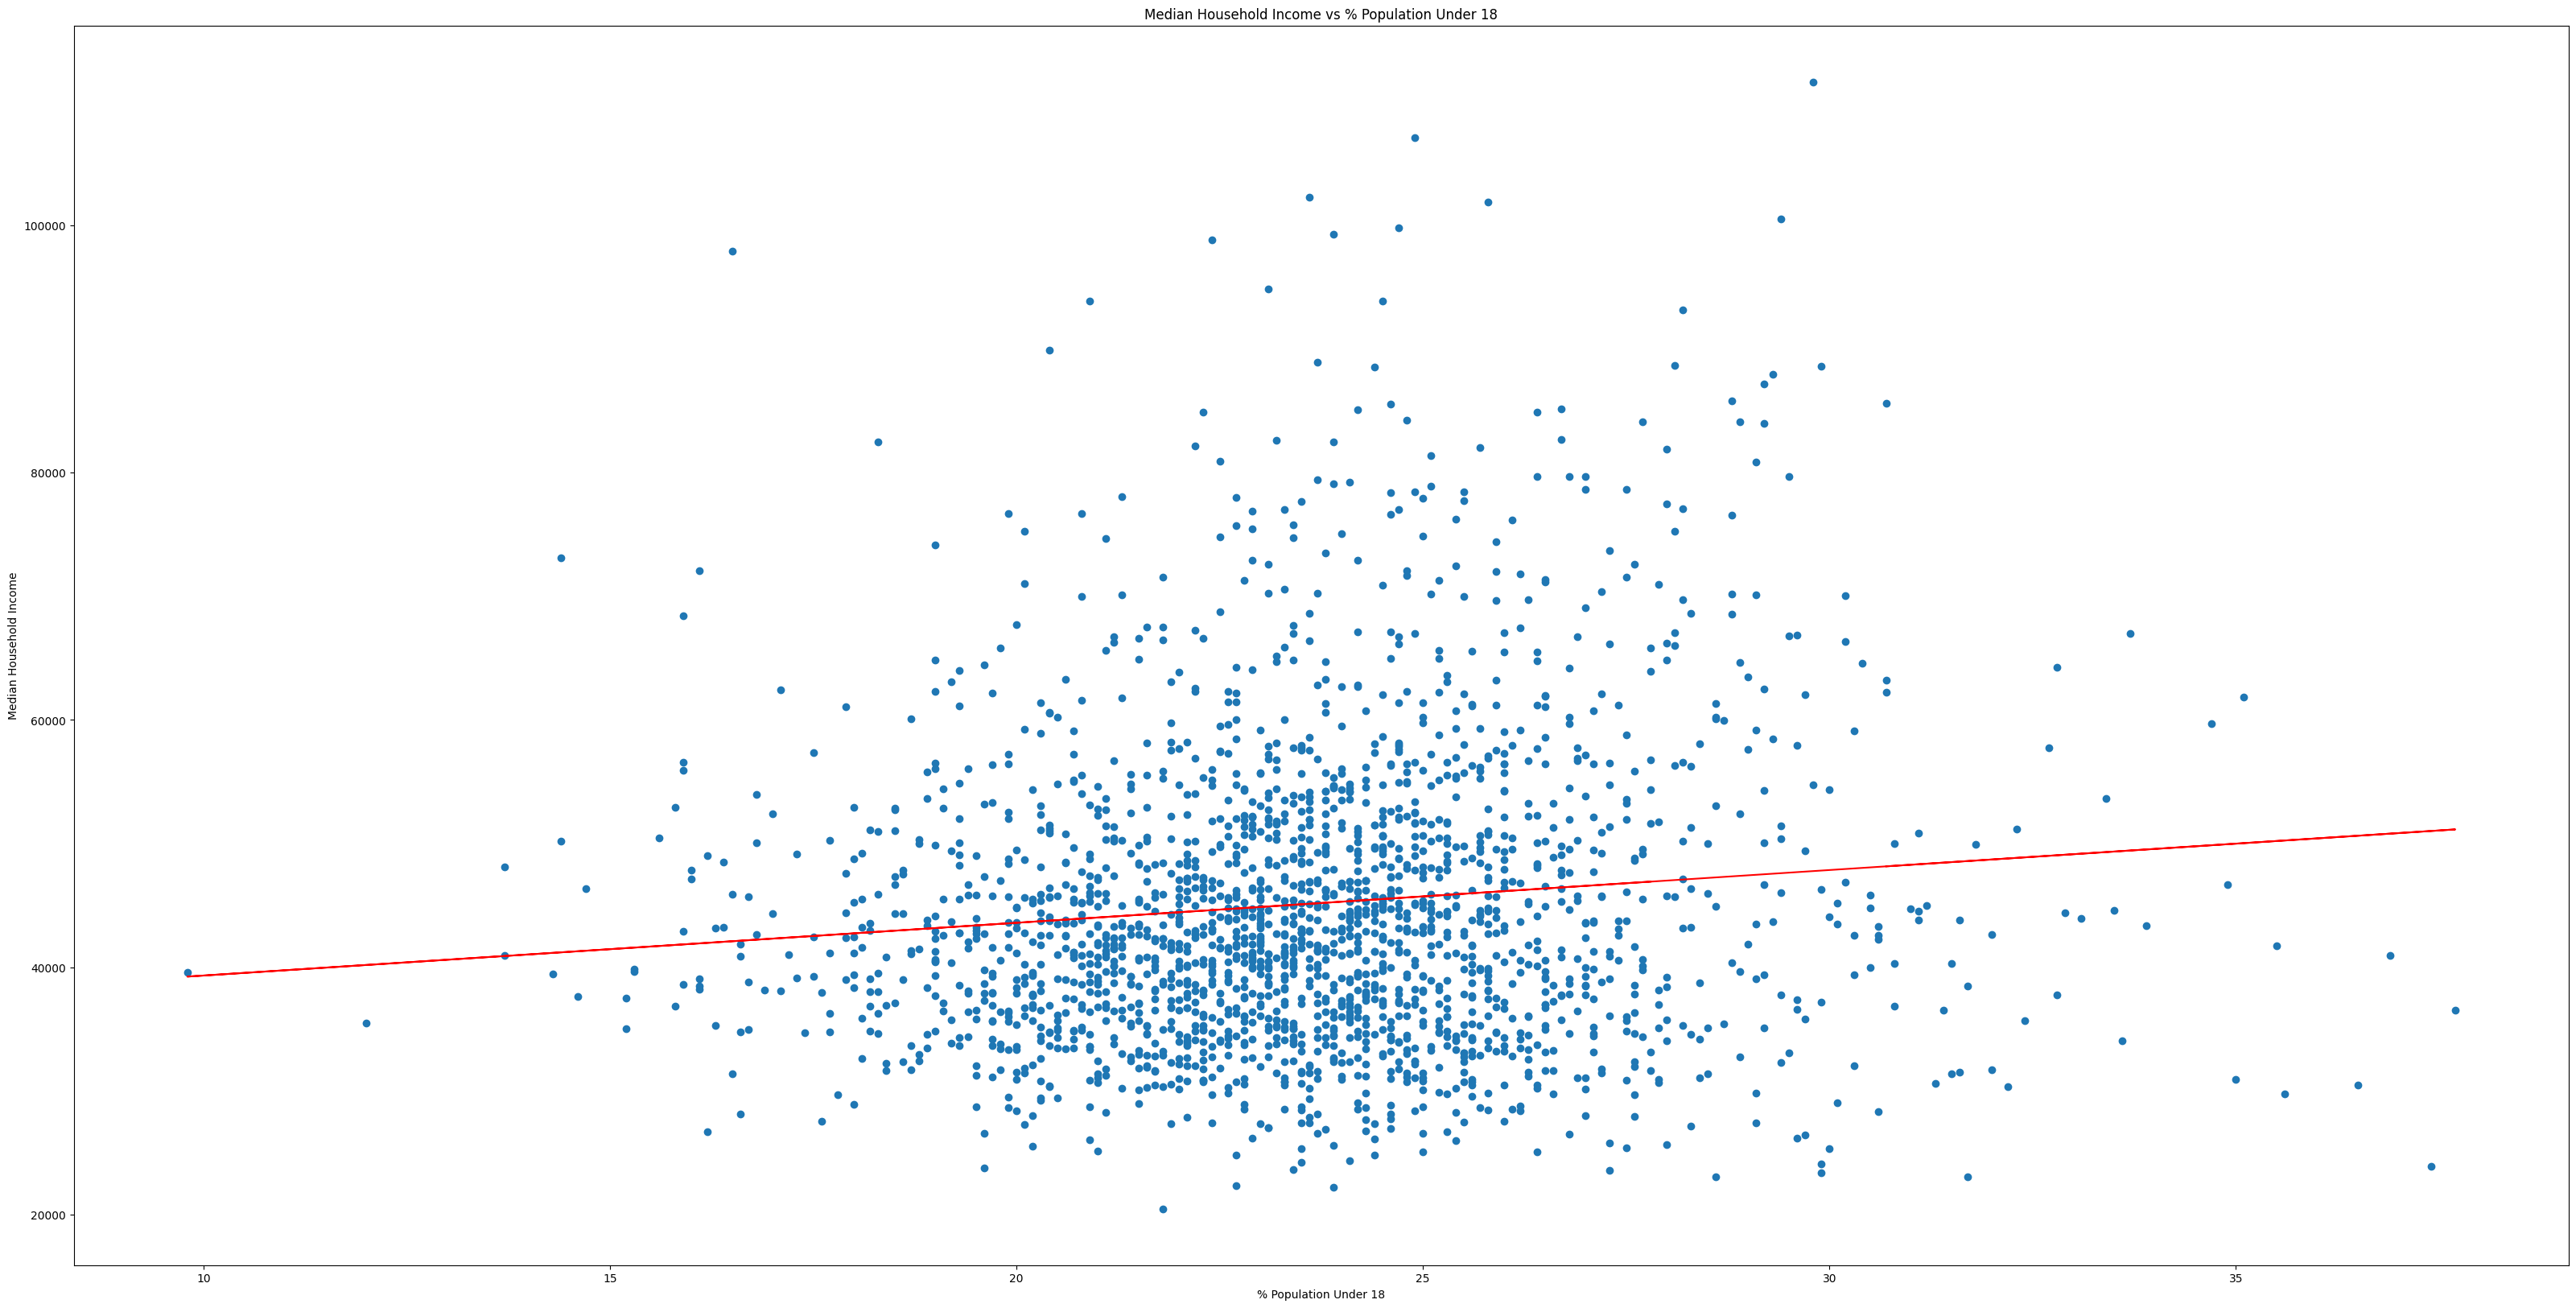

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

additional_measures_clean = pd.read_csv("../county_health_rankings/additional_measures_cleaned.csv")

plt.figure(figsize=(40, 20))
plt.scatter(x=additional_measures_clean["< 18"],y=additional_measures_clean["median household income"],)
plt.xlabel("% Population Under 18")
plt.ylabel("Median Household Income")
plt.title("Median Household Income vs % Population Under 18")

x = additional_measures_clean["< 18"]
y = additional_measures_clean["median household income"]
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
plt.plot(x, poly(x), color="red") 

plt.show()

In [37]:
import pandas as pd
import statsmodels.api as sm

# Read the dataset
additional_measures_clean = pd.read_csv(
    "../county_health_rankings/additional_measures_cleaned.csv"
)

# Ensure all variables are numeric
additional_measures_clean = additional_measures_clean.apply(
    pd.to_numeric, errors="coerce"
)

# Drop any rows with missing values
additional_measures_clean.dropna(inplace=True)

# Define independent and dependent variables
X = additional_measures_clean.drop(columns=["median household income"])
y = additional_measures_clean["median household income"]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

ValueError: zero-size array to reduction operation maximum which has no identity